# KNN on Big Mart sales dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Train.csv')
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.isnull().sum()

mean = df['Item_Weight'].mean() 
df['Item_Weight'].fillna(mean, inplace =True)

mode = df['Outlet_Size'].mode() 
df['Outlet_Size'].fillna(mode[0], inplace =True)

In [7]:
df.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type'], axis=1, inplace=True)
df = pd.get_dummies(df)

In [8]:
df = df.head(100)

In [9]:
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [10]:
print(x_train[:5])

    Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year
1         5.920         0.019278   48.2692                       2009
17        9.000         0.069196   54.3614                       1999
10       11.800         0.000000   45.5402                       1999
88        6.305         0.123116   95.6436                       1997
81       11.800         0.014087  180.3344                       1997


In [11]:
print(y_train[:5])

1      443.4228
17     718.3982
10    1516.0266
88     661.8052
81    1427.4752
Name: Item_Outlet_Sales, dtype: float64


In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [13]:
rmse_val = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1857.159538849711
RMSE value for k=  2 is: 1410.8733841723415
RMSE value for k=  3 is: 1327.2528943755979
RMSE value for k=  4 is: 1258.5370700302158
RMSE value for k=  5 is: 1210.8920748027942
RMSE value for k=  6 is: 1245.1624881221094
RMSE value for k=  7 is: 1303.721649156866
RMSE value for k=  8 is: 1281.2748759488798
RMSE value for k=  9 is: 1291.0832996532679
RMSE value for k=  10 is: 1344.3967191838065
RMSE value for k=  11 is: 1345.3965286217754
RMSE value for k=  12 is: 1323.6170839075967
RMSE value for k=  13 is: 1351.3719277166483
RMSE value for k=  14 is: 1369.990934810629
RMSE value for k=  15 is: 1366.5304995239078
RMSE value for k=  16 is: 1367.913806173097
RMSE value for k=  17 is: 1369.3662628804339
RMSE value for k=  18 is: 1373.670675131149
RMSE value for k=  19 is: 1375.5681132409995
RMSE value for k=  20 is: 1388.3861943720444


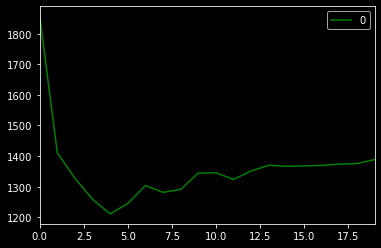

In [14]:
plt.style.use('dark_background')
curve = pd.DataFrame(rmse_val)  
curve.plot(color='green')